# Linear Regression Project-2

In [6]:
import pandas as pd

## reading the csv file

In [9]:
ds = pd.read_csv("WHR_2015.csv")

In [10]:
ds

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,Syria,Middle East and North Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [12]:
ds = ds[["country", "happiness_score", "gdp_per_capita", "healthy_life_expectancy", "perceptions_of_corruption"]]

In [13]:
ds

,country,happiness_score,gdp_per_capita,healthy_life_expectancy,perceptions_of_corruption
0,Switzerland,7.587,1.39651,0.94143,0.41978
1,Iceland,7.561,1.30232,0.94784,0.14145
2,Denmark,7.527,1.32548,0.87464,0.48357
3,Norway,7.522,1.45900,0.88521,0.36503
4,Canada,7.427,1.32629,0.90563,0.32957
...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.42864,0.55191
154,Benin,3.340,0.28665,0.31910,0.08010
155,Syria,3.006,0.66320,0.72193,0.18906
156,Burundi,2.905,0.01530,0.22396,0.10062


## understanding correlation

In [14]:
ds.corr()["happiness_score"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_6380\3899324047.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()["happiness_score"]


happiness_score              1.000000
gdp_per_capita               0.780966
healthy_life_expectancy      0.724200
perceptions_of_corruption    0.395199
Name: happiness_score, dtype: float64

## visualising the relation

In [15]:
import seaborn as sns

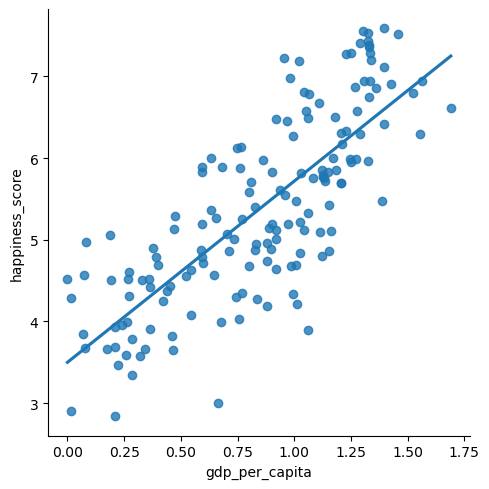

In [16]:
sns.lmplot(x = "gdp_per_capita", y = "happiness_score", data = ds, fit_reg = True, ci = None)

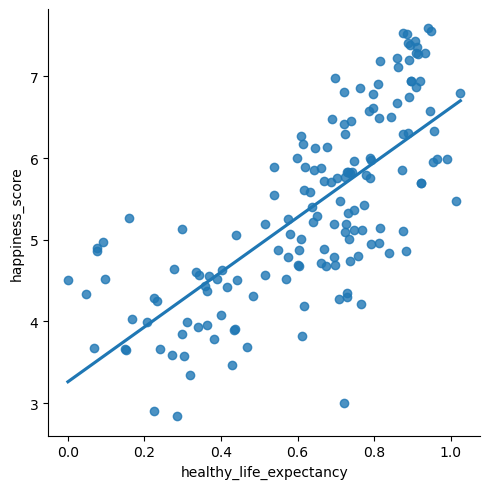

In [17]:
sns.lmplot(x = "healthy_life_expectancy", y = "happiness_score", data = ds, fit_reg = True, ci = None)

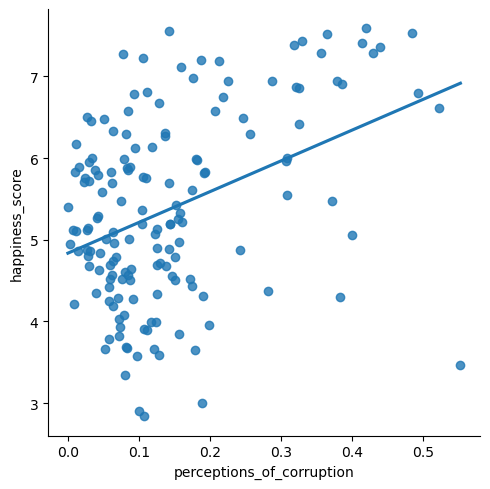

In [18]:
sns.lmplot(x = "perceptions_of_corruption", y = "happiness_score", data = ds, fit_reg = True, ci = None)

<Axes: ylabel='Frequency'>

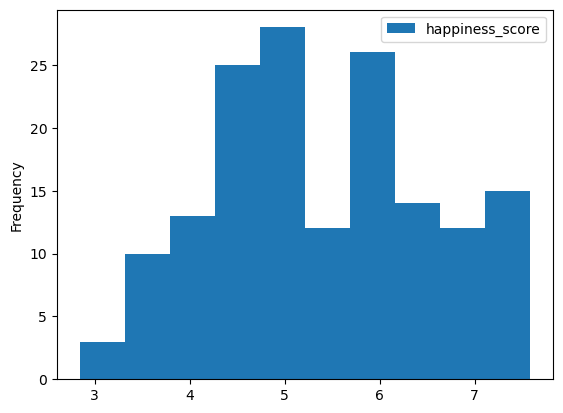

In [20]:
ds.plot.hist(y = "happiness_score")

In [21]:
ds[ds.isnull().any(axis=1)]

,country,happiness_score,gdp_per_capita,healthy_life_expectancy,perceptions_of_corruption


## training the model

In [22]:
from sklearn.model_selection import train_test_split

In [33]:
x = ds[["gdp_per_capita", "healthy_life_expectancy"]]
y = ds["happiness_score"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [35]:
x_train.shape

(126, 2)

In [36]:
x_test.shape

(32, 2)

In [37]:
y_train.shape

(126,)

In [38]:
y_test.shape

(32,)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression()

In [41]:
reg.fit(x_train, y_train)

LinearRegression()

## making a prediction

In [43]:
predictions = reg.predict(x_test)

In [44]:
predictions

array([6.46443499, 6.38782473, 6.49309865, 4.6439598 , 5.7394303 ,
       5.86702855, 6.49210022, 5.28892624, 4.01767586, 5.10734492,
       5.57605062, 6.49058061, 5.03248207, 5.62914352, 4.3687236 ,
       5.59381515, 6.2158516 , 5.93187931, 6.46801205, 3.98262958,
       3.96658712, 5.18878576, 5.92290952, 4.03486966, 4.11845704,
       5.34185601, 6.43831116, 4.15970002, 5.36648478, 5.49415832,
       6.70126282, 4.10855813])

### accuracy 63% 

In [46]:
reg.score(x_test, y_test)

0.6353892423181868